In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

100% 63.7k/63.7k [00:00<00:00, 333kB/s]
100% 63.7k/63.7k [00:00<00:00, 332kB/s]


In [5]:
from zipfile import ZipFile

dataset = '/content/crop-recommendation-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
df = pd.read_csv("/content/Crop_recommendation.csv")

In [7]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<ipython-input-12-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

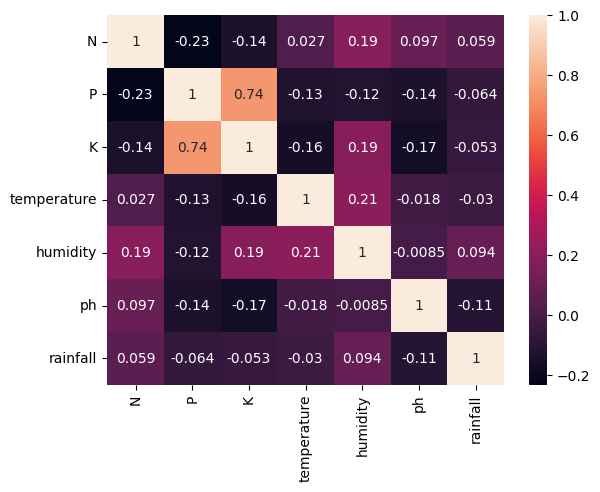

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

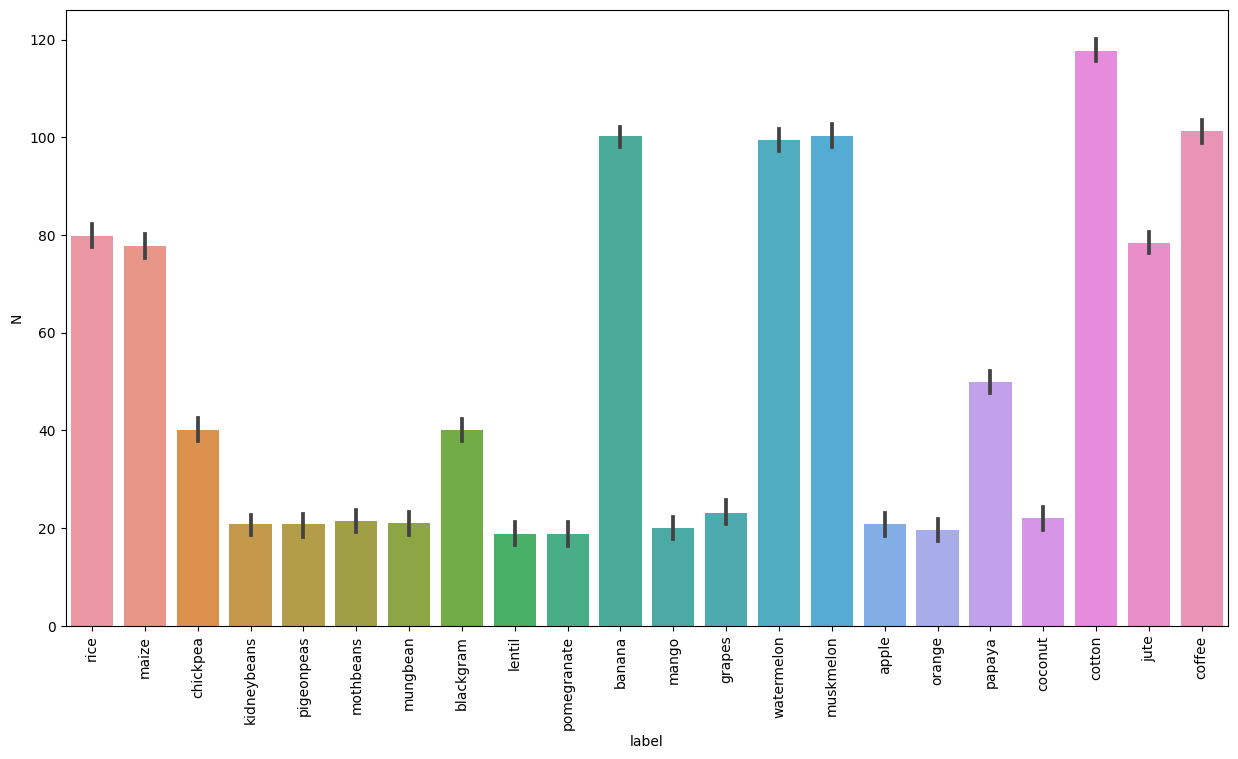

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="label", y="N")
plt.xticks(rotation=90);

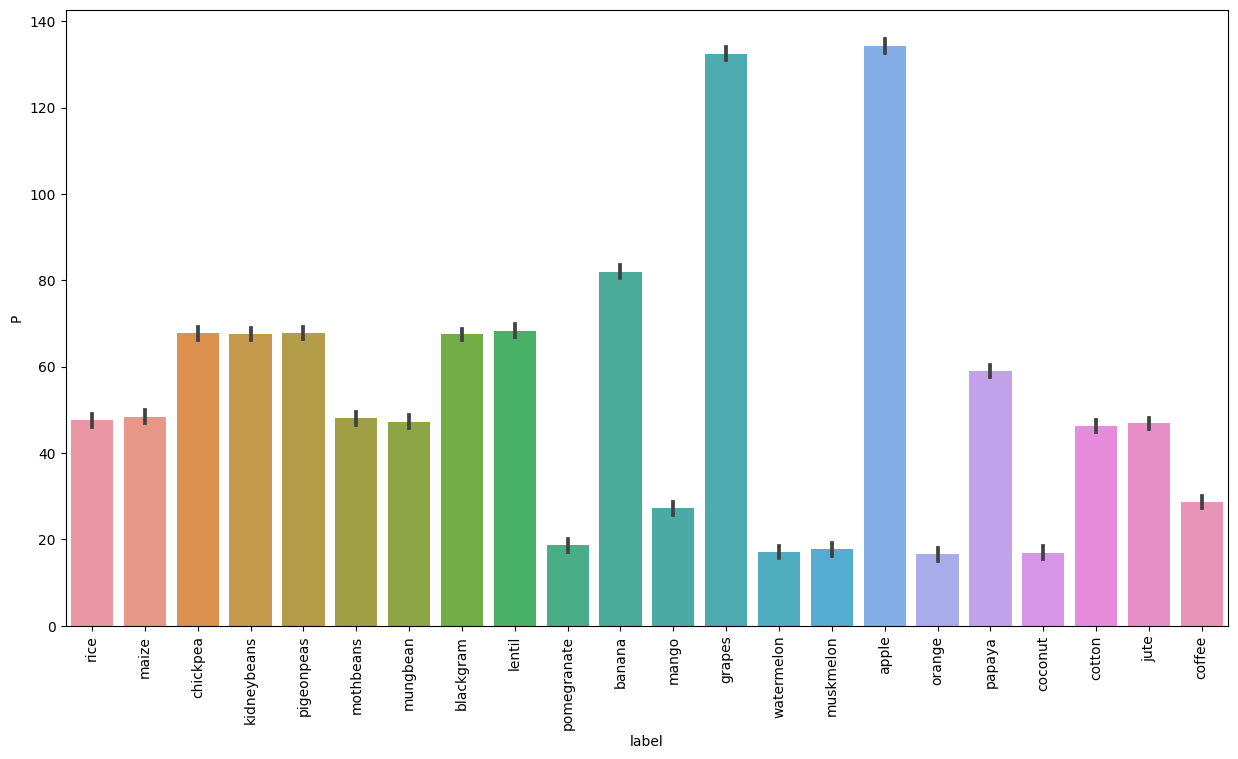

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="label", y="P")
plt.xticks(rotation=90);

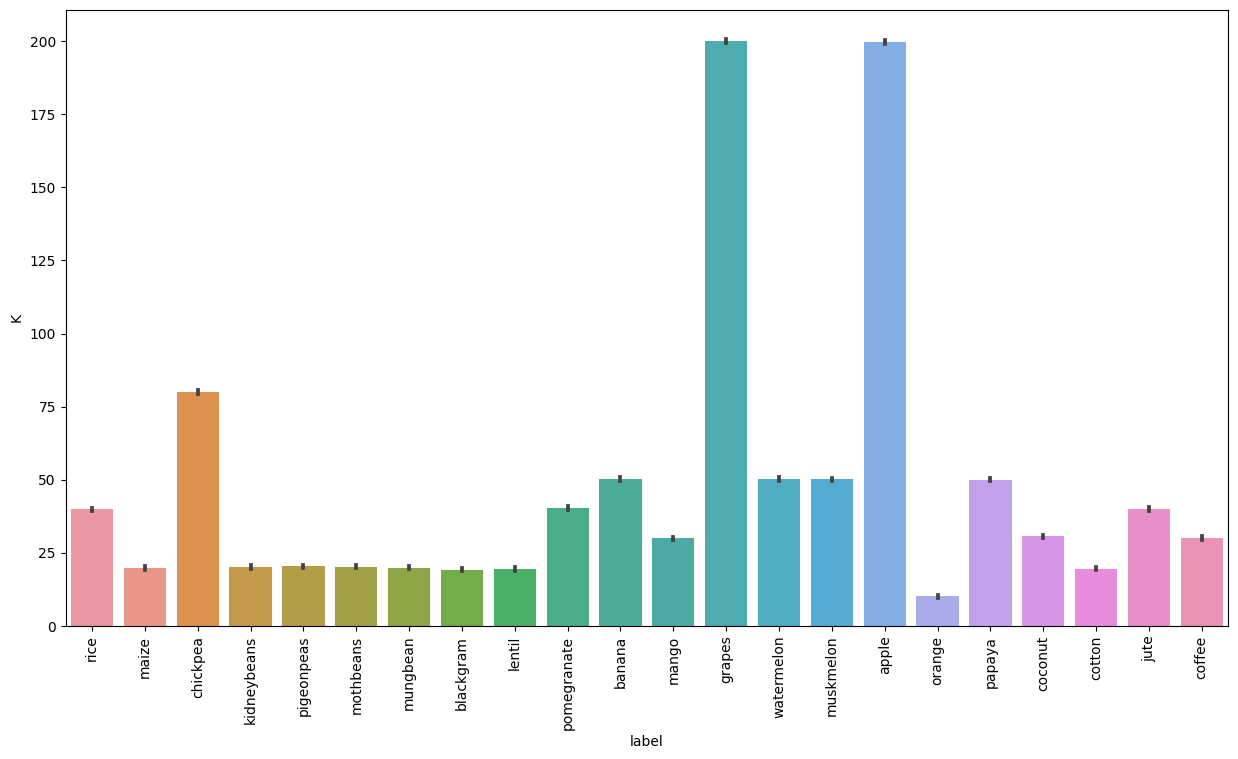

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="label", y="K")
plt.xticks(rotation=90);

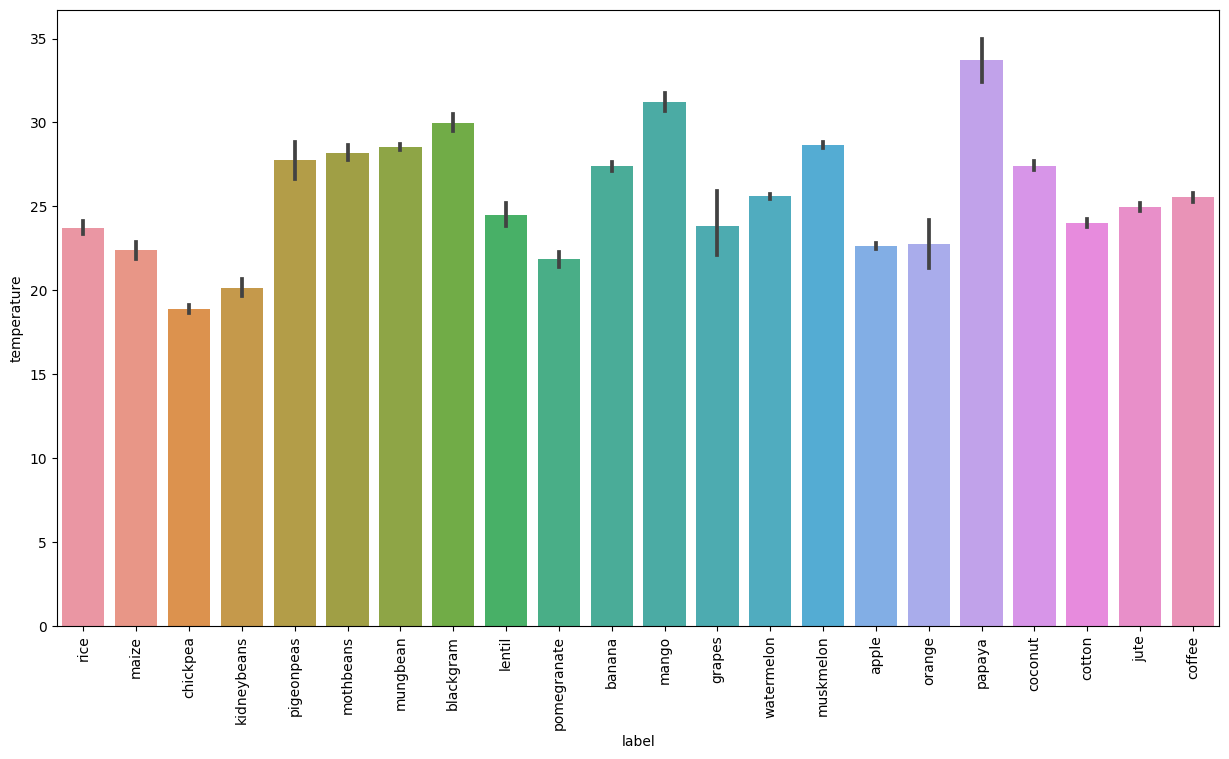

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="label", y="temperature")
plt.xticks(rotation=90);

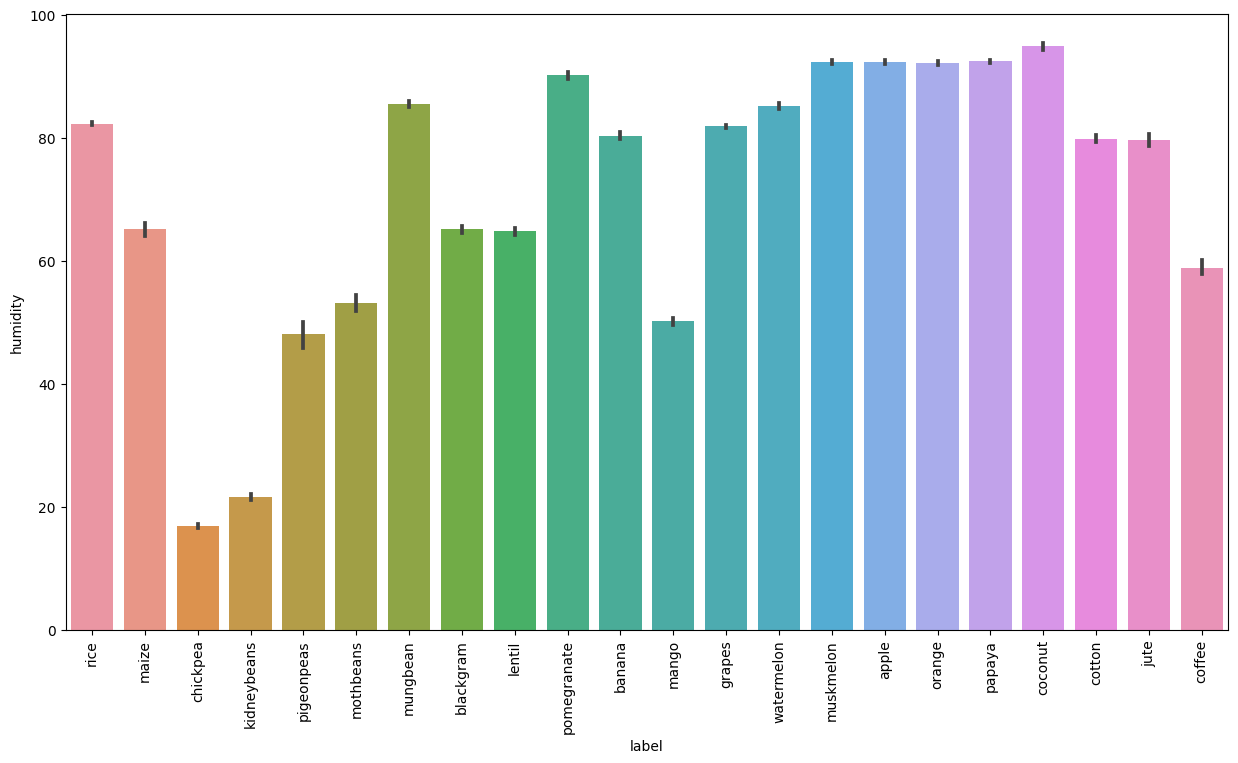

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="label", y="humidity")
plt.xticks(rotation=90);

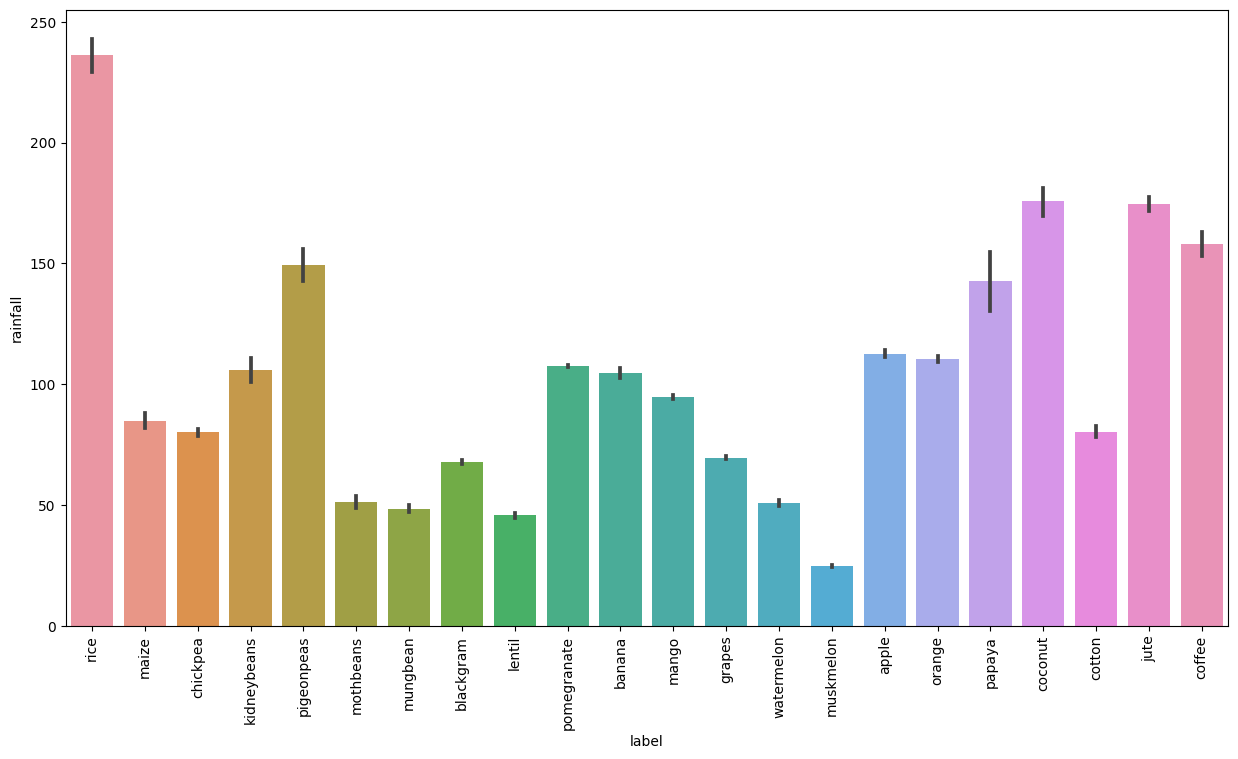

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="label", y="rainfall")
plt.xticks(rotation=90);

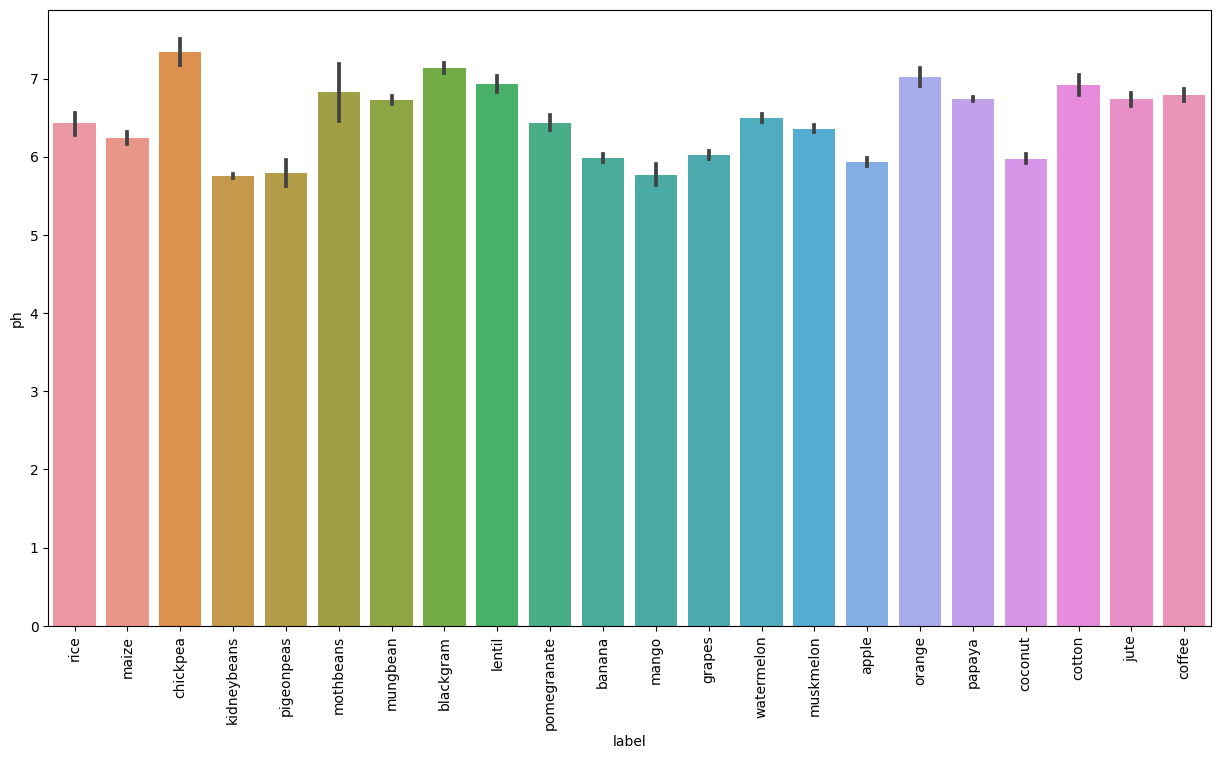

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x="label", y="ph")
plt.xticks(rotation=90);

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [22]:
X = df.drop(['label'],axis=1)
y = df['label']

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train,y_train)

pred = model.predict(X_test)

x = accuracy_score(y_test, pred)


print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,pred))

Logistic Regression's Accuracy is:  0.9545454545454546
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.94      0.85      0.89        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       0.91      1.00      0.95        20
      cotton       0.94      0.80      0.86        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      0.75      0.79        20
 kidneybeans       1.00      0.95      0.97        20
      lentil       1.00      0.95      0.97        20
       maize       0.82      0.90      0.86        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.83      1.00      0.91        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_result(y_true,y_pred):
    model_accuracy = accuracy_score(y_true,y_pred)*100
    model_precision, model_recall, model_f1,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
    model_result = {"accuracy":model_accuracy,
                    "precision":model_precision,
                    "recall":model_recall,
                    "f1":model_f1}
    return model_result

In [27]:
result = calculate_result(y_true=y_test,
                          y_pred=pred)
result

{'accuracy': 95.45454545454545,
 'precision': 0.9559973300615012,
 'recall': 0.9545454545454546,
 'f1': 0.9541826279368583}

In [28]:
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.9545454545454546

<Figure size 2000x1000 with 0 Axes>

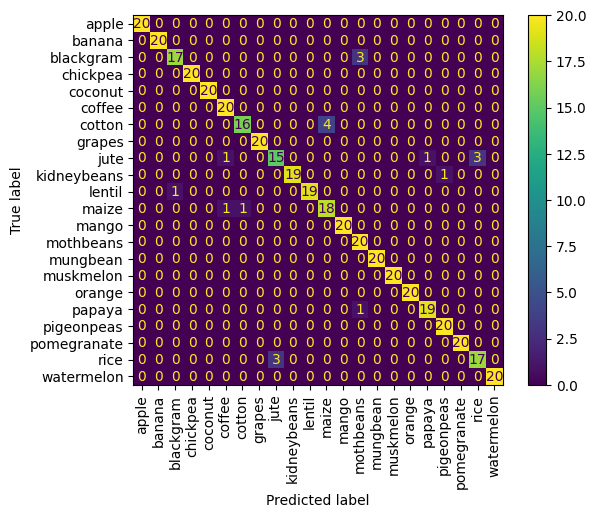

In [29]:
plt.figure(figsize=(20,10))
cm = confusion_matrix(y_test, X_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
import pickle
pickle.dump(model,open('crop_model.pkl','wb'))